In [1]:
from dotenv import load_dotenv
import os

# .env 파일에서 환경 변수를 로드합니다.
load_dotenv()

# 환경 변수에서 PINECONE_API_KEY를 가져옵니다.
PINECONE_API_KEY = os.environ['PINECONE_API_KEY']

# index 생성

In [2]:
from pinecone import Pinecone
# 클라이언트 생성
pinecone_client = Pinecone(api_key=PINECONE_API_KEY)

In [5]:
pinecone_client

## 클라이언트.create_index

In [6]:
from pinecone import ServerlessSpec
pinecone_client.create_index(
  name='embedding-3d',
  dimension=3,
  metric='cosine',
  spec=ServerlessSpec(
    cloud='aws',
    region='us-east-1'
  )
)

{
    "name": "embedding-3d",
    "metric": "cosine",
    "host": "embedding-3d-506yx3r.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 3,
    "deletion_protection": "disabled",
    "tags": null
}

In [3]:
index = pinecone_client.Index('embedding-3d')
index

c:\Users\Admin\miniconda3\envs\prompting_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

In [5]:
for ids in index.list(namespace='embedding-3d-ns1'):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# pinecone data 형식
[{ 'id' : 'vec1' , 'values' :[1.0, 1.5, 2.0] , 'metadata' : {'genre':'drama'}},
{ 'id' : 'vec2' , 'values' :[2.0, 1.5, 0.5] , 'metadata' : {'genre':'action'}},
{ 'id' : 'vec3' , 'values' :[0.1, 0.3, 0.5] , 'metadata' : {'genre':'drama'}},
{ 'id' : 'vec4' , 'values' :[1.0, 2.5, 3.5] , 'metadata' : {'genre':'action'}},
{ 'id' : 'vec5' , 'values' :[3.0, 1.2, 1.3] , 'metadata' : {'genre':'action'}},
{ 'id' : 'vec6' , 'values' :[0.3, 1.1, 2.5] , 'metadata' : {'genre':'drama'}},
]

In [12]:
index.upsert(
  vectors=[{ 'id' : 'vec1' , 'values' :[1.0, 1.5, 2.0] , 'metadata' : {'genre':'drama'}},
    { 'id' : 'vec2' , 'values' :[2.0, 1.5, 0.5] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec3' , 'values' :[0.1, 0.3, 0.5] , 'metadata' : {'genre':'drama'}},
    { 'id' : 'vec4' , 'values' :[1.0, 2.5, 3.5] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec5' , 'values' :[3.0, 1.2, 1.3] , 'metadata' : {'genre':'action'}},
    { 'id' : 'vec6' , 'values' :[0.3, 1.1, 2.5] , 'metadata' : {'genre':'drama'}},
    ],
  namespace='embedding-3d-ns1'
  ) #update + insert

{'upserted_count': 6}

In [13]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

# id list

In [14]:
for ids in index.list(namespace='embedding-3d-ns1'):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# query 

In [7]:
response = index.query(
  namespace='embedding-3d-ns1',
  vector=[0.1, 0.4, 0.7], #질의 벡터
  top_k=3, #몇개 결과
  include_values=True,
  include_metadata=True,
  filter={'genre':{'$eq':'drama'}}
)
response

{'matches': [{'id': 'vec3',
              'metadata': {'genre': 'drama'},
              'score': 1.00008953,
              'values': [0.1, 0.3, 0.5]},
             {'id': 'vec6',
              'metadata': {'genre': 'drama'},
              'score': 0.99550879,
              'values': [0.3, 1.1, 2.5]},
             {'id': 'vec1',
              'metadata': {'genre': 'drama'},
              'score': 0.961182,
              'values': [1.0, 1.5, 2.0]}],
 'namespace': 'embedding-3d-ns1',
 'usage': {'read_units': 1}}

In [8]:
response = index.query(
  #namespace='embedding-3d-ns1',
  vector=[0.1, 0.4, 0.7], #질의 벡터
  top_k=3, #몇개 결과
  include_values=True,
  include_metadata=True,
  filter={'genre':{'$eq':'drama'}}
)
response

{'matches': [], 'namespace': '', 'usage': {'read_units': 1}}

In [10]:
ns = 'embedding-3d-ns1'
for ids in index.list(namespace=ns):
  print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# fetch

In [14]:
from itertools import chain
all_ids = list(chain.from_iterable(index.list(namespace=ns)))
resp = index.fetch(ids=all_ids, namespace=ns)
resp

FetchResponse(namespace='embedding-3d-ns1', vectors={'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None), 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None), 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}, usage={'read_units': 1})

In [15]:
resp.vectors

{'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None),
 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}

In [16]:
for vid, v in resp.vectors.items():
  vid, v.values

# page - 1개 벡터씩 꺼내기

In [26]:
for id_page in index.list(namespace=ns):
  print('*',id_page)
  resp = index.fetch(ids=id_page, namespace=ns)
  for vid, v in resp.vectors.items():
    print(vid, v.values)

* ['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']
vec2 [2.0, 1.5, 0.5]
vec6 [0.3, 1.1, 2.5]
vec3 [0.1, 0.3, 0.5]
vec5 [3.0, 1.2, 1.3]
vec4 [1.0, 2.5, 3.5]
vec1 [1.0, 1.5, 2.0]


# 새로운 쿼리벡터 추가하기

In [28]:
ids = list(resp.vectors.keys())
values = [vec.values for vec in resp.vectors.values()]

In [29]:
ids.append('qv')
values.append([0.1,0.3,0.7]) #dimension 일치

# 시각화

In [31]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 20.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 20.2 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.5 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- ---------------------

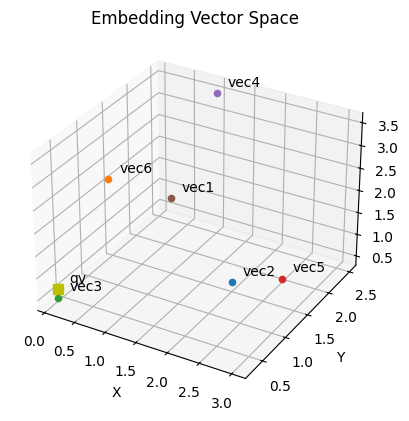

In [32]:
import matplotlib.pyplot as plt

# 3D 플롯을 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 벡터의 ID와 값을 사용하여 3D 공간에 점을 그립니다.
for i, id in enumerate(ids):
    if id == "qv":
        # 쿼리 벡터는 노란색 사각형으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id, color='y', s=50, marker='s')
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)
    else:
        # 나머지 벡터는 기본 색상으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id)
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)

# 축 레이블과 제목을 설정합니다.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Embedding Vector Space')

# 플롯을 표시합니다.
plt.show()

# 임베딩 미션

name: "quickstart" 서버리스 인덱스 생성
dim: 1024, 

In [ ]:
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]

임베딩 모델
multilingual-e5-large
upsert()
describe_index_stats()
query_vector : "애플이라는 기술 회사에 대해 알려주세요."
index.query()

embeddings = pinecone_client.inference.embed(
  model='multilingual-e5-large'
  input = [d['text'] for d in data]
  parameters={"input_type":"passage", "truncate":"END"}
)
embeddings[0]